<a href="https://colab.research.google.com/github/zulfanakbar/PCVK/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


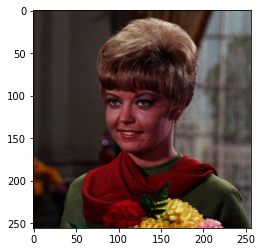

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

**F. TUGAS PRAKTIKUM**


1. Buat Gamma Correction sesuai dengan petunjuk berikut

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 4


NameError: ignored


2. Buat Simulasi Image Depth
  
  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada
kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Percobaan ini hanya memanipulasi warna sehingga jumlah warnanya sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.








3. Buat modul Average Denoising

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

In [ ]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

NameError: ignored

Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai db: 6


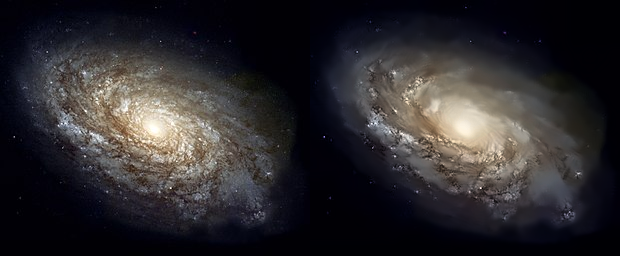

In [ ]:
from matplotlib import pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  db = int(input('Masukkan nilai db: '))
except ValueError:
  print('Error, not a number')

img2 = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# denoising of image saving it into dst image 
dst = cv.fastNlMeansDenoisingColored(img2, None, 10, db, 7, 15) 
  
# Plotting of source and destination image 
final_frame = cv.hconcat((img2, dst))
cv2_imshow(final_frame)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg), sedangkan image kanan adalah haslinya :

In [ ]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan analisa kenapa citra keluaranya seperti itu.

**OR**

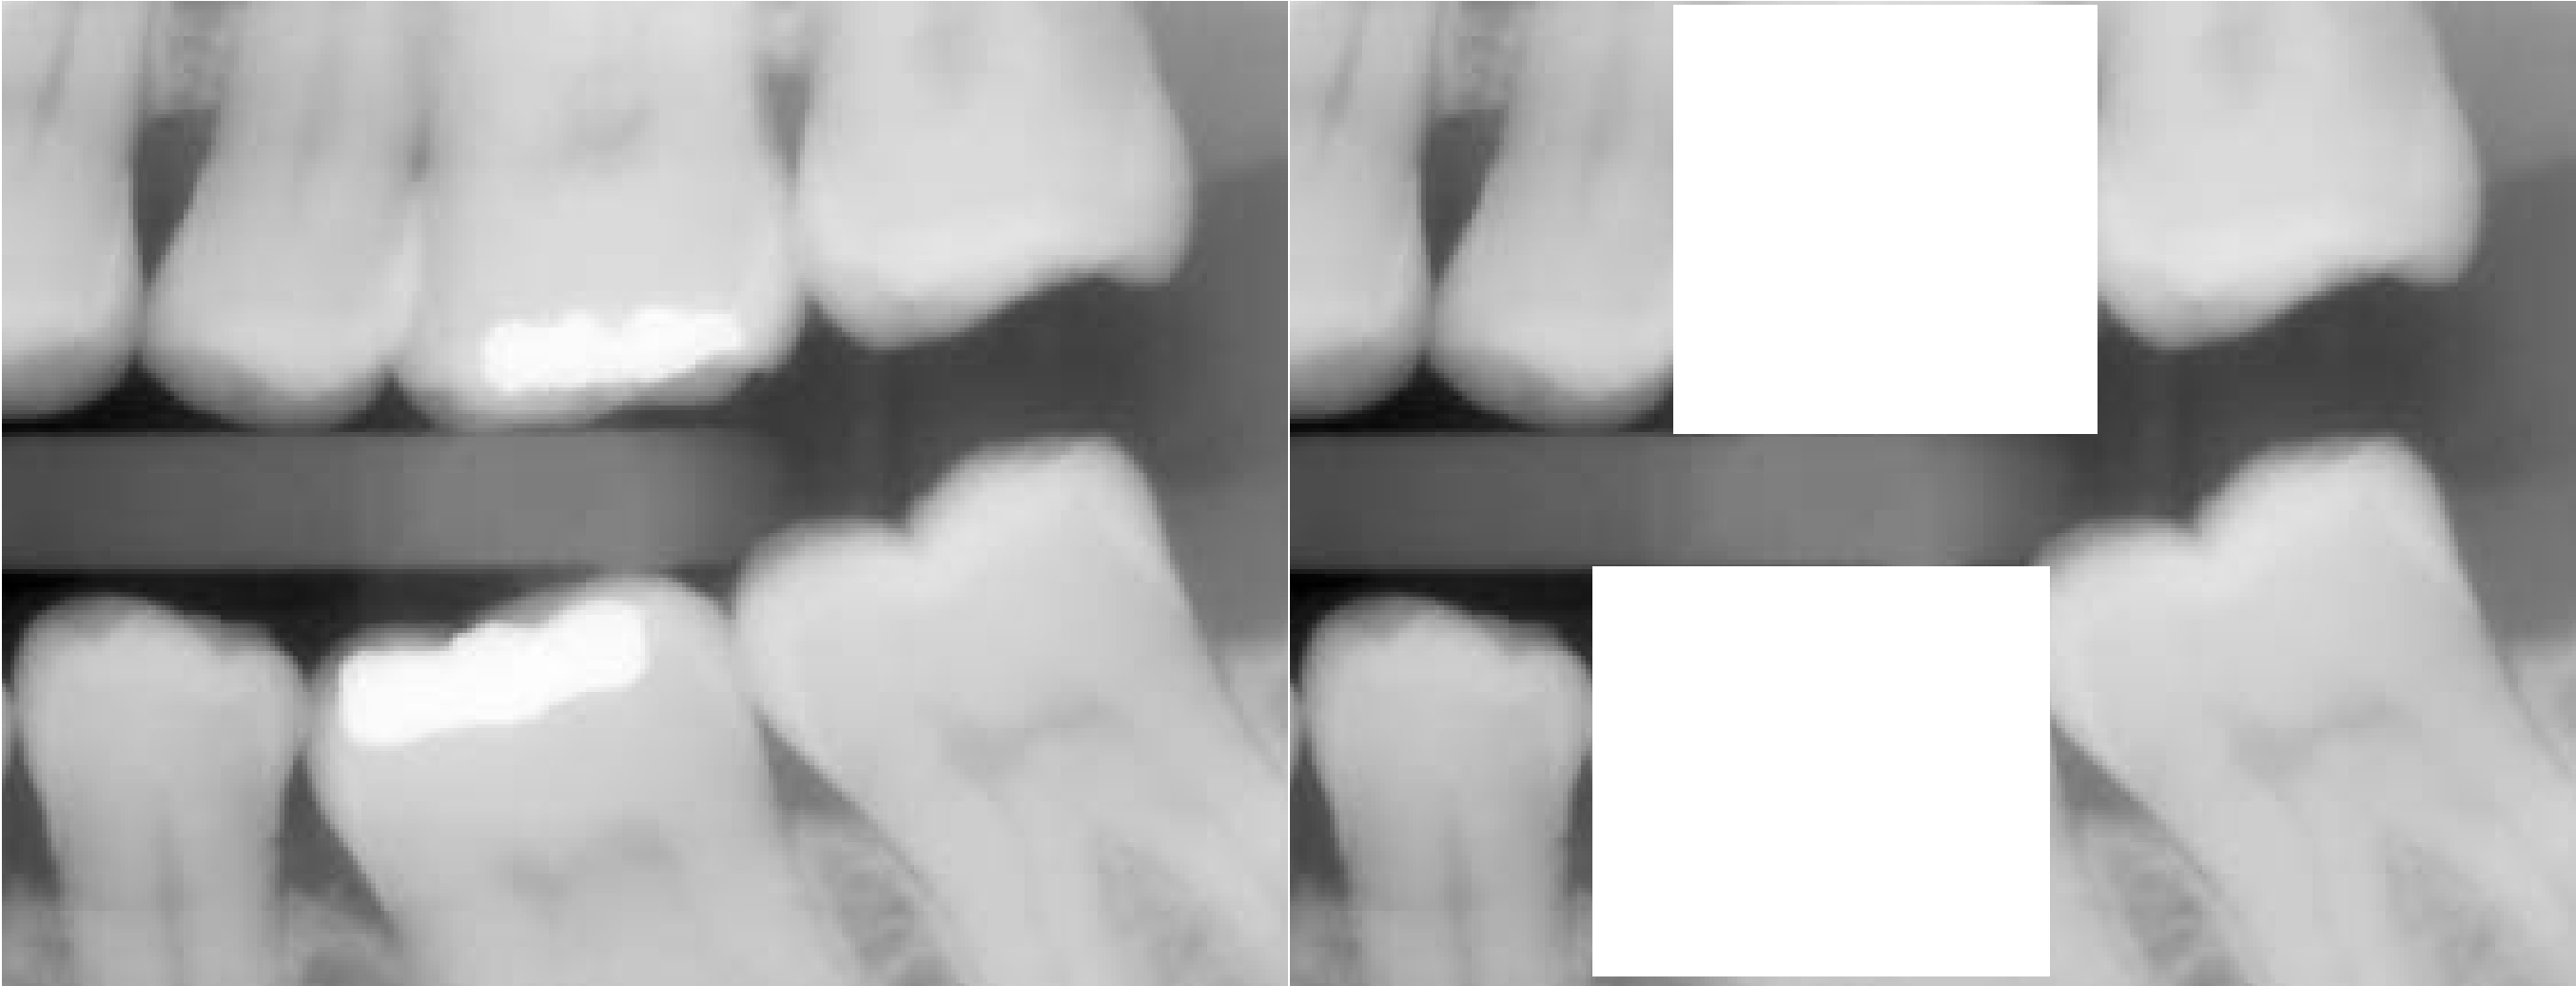

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

**NOT**

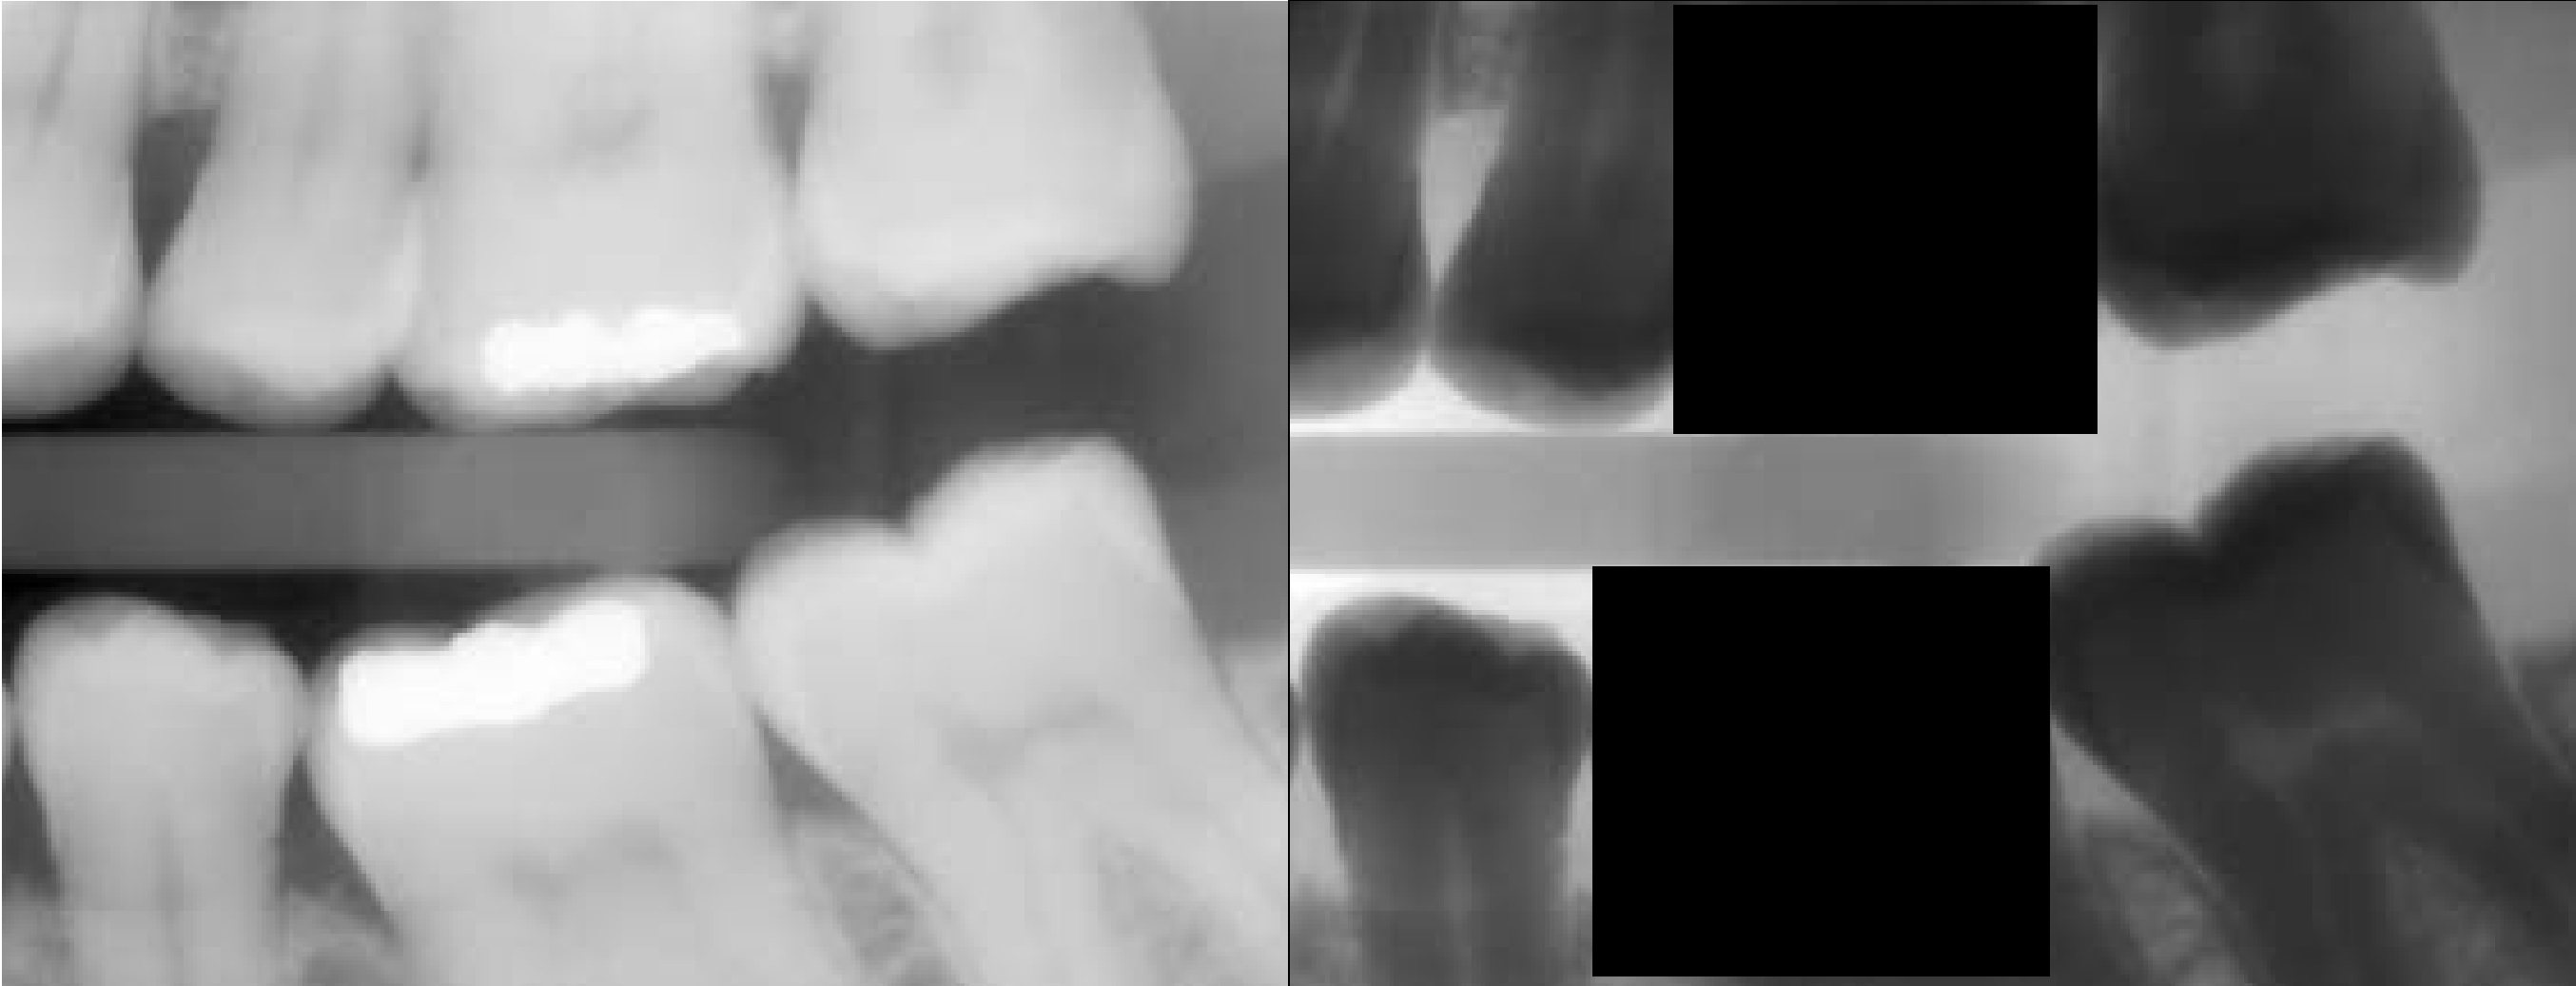

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

**NAND**

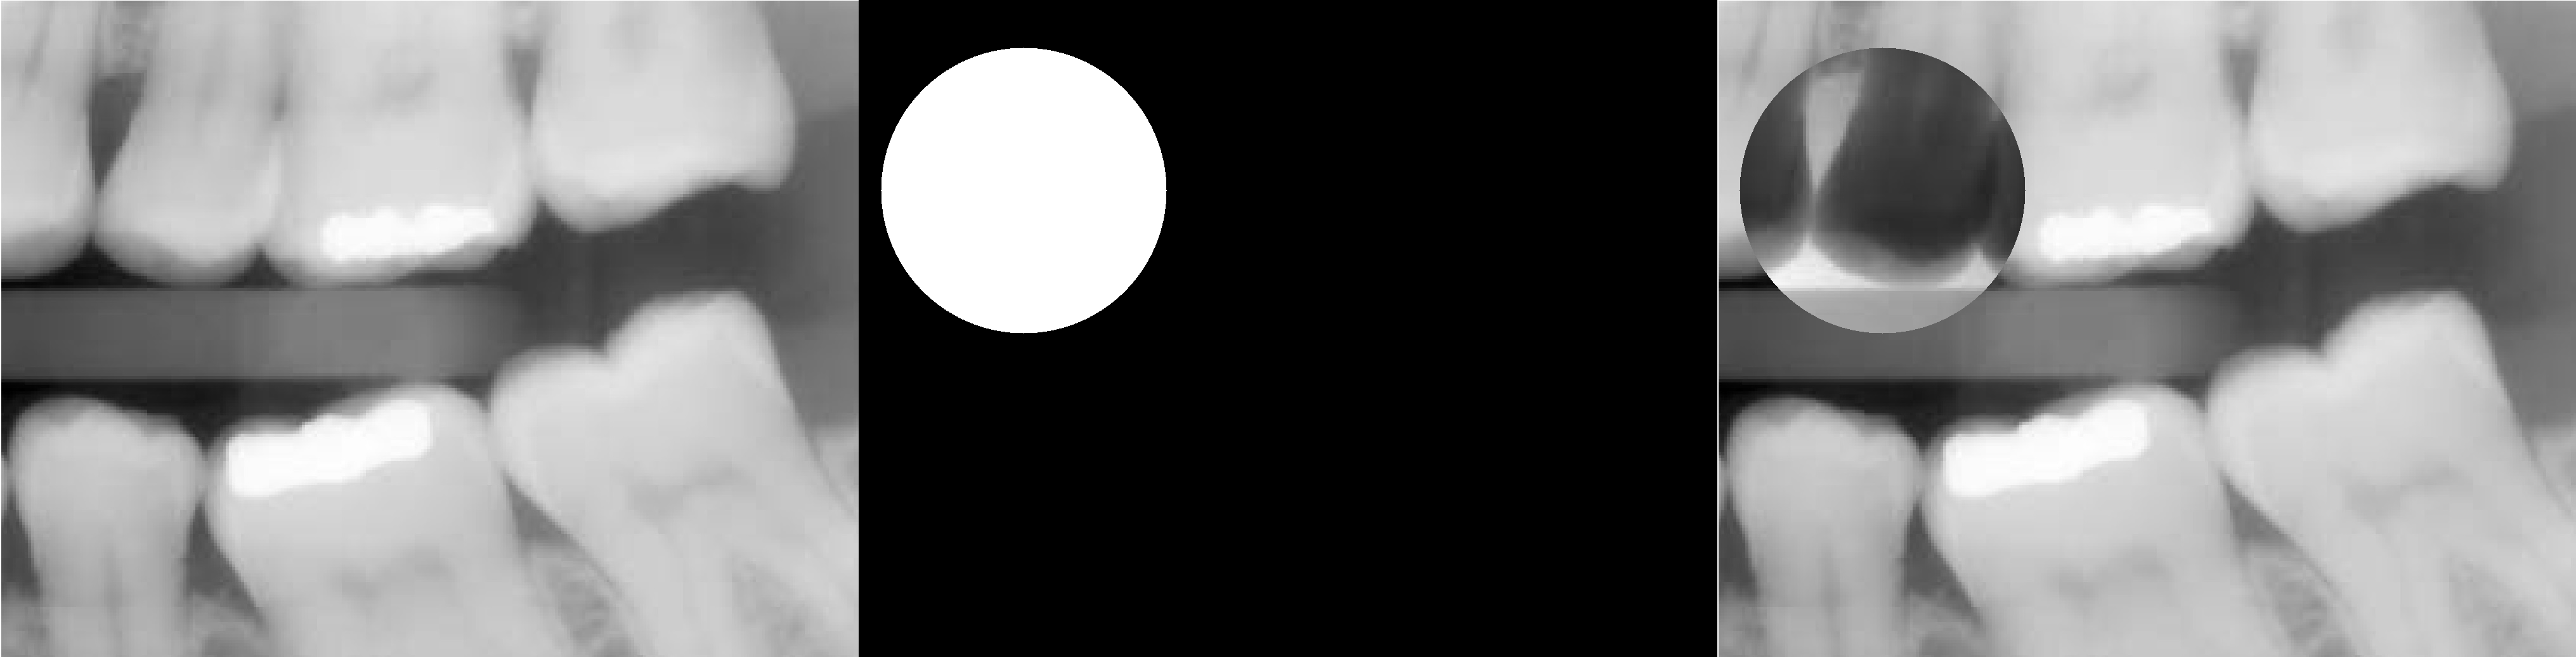

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img ^ mask

rose_frame = cv.hconcat((img, mask, masked))
cv2_imshow(rose_frame)

**XOR**

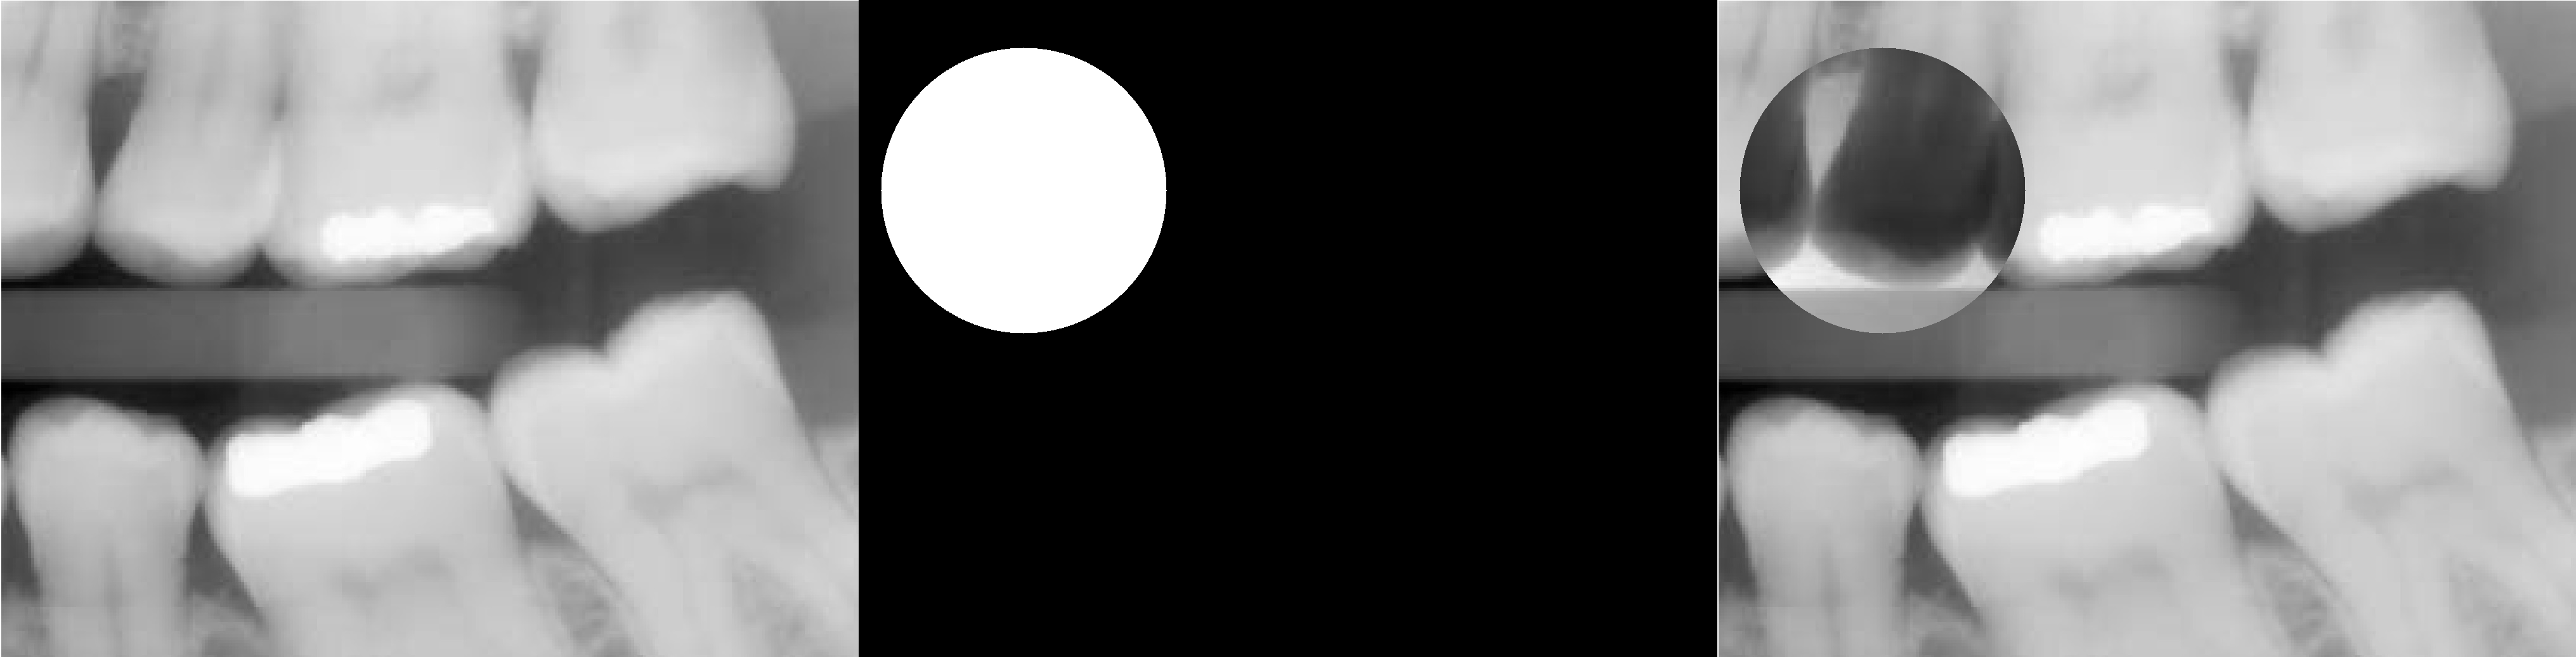

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)